Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# by Theodore Margoles
    - no other contributors

---

# KNN and Perceptron Homework

## Overview 
***


In this homework you will implement a prototype-based k-NN and a Perceptron classifier. For the Perceptron classifier, you will implement the learning algorithm described in class.

Here are the rules: 

- If you want to load a different Python library, you should check with the staff first (ask on Piazza).
- Don't change function signatures / APIs. Be sure to add code only where "your code here" is listed. If you need additional scratch space, you can add code in the areas marked by `# scratch space`. 
- For the Math problems, you will enter your answer as a multiple choice response in a code cell block. Ensure you format your answer as described in the problem.

### Linear Algebra - 10 points
***
Given matrix:

$$
\begin{equation*}
\mathbf{A} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix}
\end{equation*}
$$

Answer the following questions:

**1.** Are the vectors $\begin{equation*} \mathbf{x} = \begin{bmatrix}2\\-1\\0\end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix}, \mathbf{z} = \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} \end{equation*}$ linearly independent? Input answer should be "yes" or "no".

In [1]:
prob1_answer = "yes"

**2.** Which of the following is an eigenvector of $\mathbf{A}$? 

a. $\begin{bmatrix}1\\-\sqrt{2}\\1\end{bmatrix}$

b. $\begin{bmatrix}1\\1\\1\end{bmatrix}$

c. $\begin{bmatrix}1\\\sqrt{2}\\-1\end{bmatrix}$

d. $\begin{bmatrix}-1\\0\\1\end{bmatrix}$

Input your answer as either `"a"`, `"b"`, `"c"`, or `"d"`.

In [2]:
prob2_answer = "d"

In [3]:
# Do not remove this cell.

**3.** Let $M$ be any matrix with real entries. $M$ is *positive semidefinite* if, for any vector $x$ with real components, the dot product of $Mx$ and $x$ is nonnegative, $\langle Mx, x \rangle \geq 0$

Let $B = \begin{bmatrix}1 & 2\\-2 & 1\end{bmatrix}$. 

Is B positive semidefinite? Enter your answer as "yes" or "no".

Hint: Write out the equation for $x^TBx$.

In [4]:
prob3_answer = "yes"

In [5]:
# Do not remove this cell.


**4.** A *symmetric* matrix $H$ is positive semidefinite if and only if the eigenvalues of $H$ are all non-negative. Is matrix $A$ positive semidefinite? Why?

In [6]:
prob4_answer = "yes"

1. this is because the eigenvalues of A end up being {${ 2,   2 + \sqrt{2},   2 - \sqrt{2}}$} all of which are greater than zero. 
2. this is the solution to the equation $\det(A - LI) = 0$ where $L$ = $lambda$, 
3. which ends up being the solution to: $(2 - L)^{3} - 2(2- L) = 0$

### Prototype Based K-NN - 10 points

In this problem you will implement a prototype-based k-NN classifier to take an image of a handwritten digit and predict the label of the digit.

In [7]:
import numpy as np
import matplotlib.pylab as plt
import pickle
import gzip
from sklearn.datasets import fetch_openml, load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [8]:
# This cell downloads the mnist dataset, converts the labels to numeric
# format, and splits into train/test. Do not modify. It may take 1-2 minutes
# if the network connection is slow.

class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):
        # store for use later  
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        
        # Convert the labels to numeric labels
        labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        for idx, l in enumerate(labels):
            y[y == l] = idx
        y = y.astype(np.int32)
            
                        
        self.train_x, self.train_y = X[:50000,:], y[:50000]

        self.test_x, self.test_y = X[60000:,:], y[60000:]
        
DATA_PATH = "mnist.pklz"
data = Numbers(DATA_PATH)

In [9]:
assert(data.train_x.dtype == np.float64)
assert(data.train_y.dtype == np.int32)

The class above will load and store the MNIST data.  Run the above cells then fill in
the code in the immediate cell below to calculate: 
- The number of examples in the training set 
- The number of examples in the test set 
- The number of pixels in each image. 

In [10]:
# Here are the numbers you need to provide here:
num_training_examples = 0
num_test_examples = 0
pixels_per_image = 0
# YOUR CODE HERE
num_training_examples = len(data.train_y)
num_test_examples = len(data.test_y)
pixels_per_image = data.train_x[0].size

print(num_training_examples, num_test_examples, pixels_per_image)

50000 10000 784


In [11]:
# Do not remove this cell.


### Dataset Exloration

In the cell below, write some code to explore the data. For example, you might plot the number of examples for each class (0-9) as a histogram. A desireable property of a dataset is for it to have a roughly balanced number of examples per class.

C:\Users\tsmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.1096    , 0.12617778, 0.1104    , 0.11335556, 0.10797778,
        0.10013333, 0.11002222, 0.115     , 0.1076    , 0.11084444]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

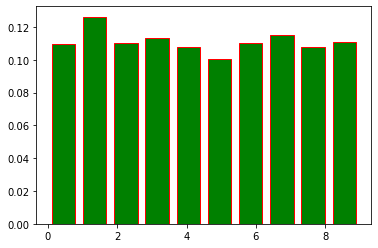

In [12]:
plt.hist(data.train_y, bins=10, normed=True, color='g', edgecolor='r', rwidth=0.75)

The cells below build a K-Nearest Neighbor classification on the handwritten digit data similar to how we explored KNN for the Iris dataset in our in-class notebooks. However, we will introduce a second parameter besides `k`. Instead of running the nearest-neighbor search on the whole dataset, which would be computationally intensive, we will select a subset of points called "prototypes" to conduct the nearest neighbor search. We will explore the effect of `k` and `p` on performance.

Follow the prompts and implement the following functions. We provide some "sanity check" tests, but these tests are not exhaustive. You can write additional code to check your functions in the scratch space. Your code will be tested against other test cases which are hidden.

1. Write the function `select_prototypes` that selects prototype examples randomly from a dataset.

Hint/warning: If you use the `np.random.choice function`, be sure to inspect the `replace` argument.

In [13]:
def select_prototypes(X_train, y_train, num_prototypes : int):
    '''
    Given a matrix X_train and y_train,
    return two matrixes X_train_proto and y_train_proto
    that contain a subset of the data given (a subset of the rows),
    where the subset is of size num_prototypes.
    
    Note that you must use the same subset indices for X_train and y_train
    
    Args: X_train (np.ndarray) - the dataset (training data)
          y_train (np.ndarray) - the dataset (labels)
          num_prototypes (int)
          
    Returns: 
          X_train_proto (np.ndarray) a subset of the dataset rows
          y_train_proto (np.ndarray) a subset of the labels
    '''
    X_train_proto = X_train
    y_train_proto = y_train
    
    # YOUR CODE HERE
    new_i = np.random.choice([i for i in range(len(X_train))], size=num_prototypes, replace=False,)
    X_train_proto = np.array([X_train[i] for i in new_i])
    y_train_proto = np.array([y_train[i] for i in new_i])
    return X_train_proto, y_train_proto

# scratch space

In [14]:
test_X = np.array([[1,2],[3,4]])
test_Y = np.array([1, -1])
X_test_proto, y_test_proto = select_prototypes(test_X, test_Y, 1)
assert( type(X_test_proto) == np.ndarray )
assert( type(y_test_proto) == np.ndarray)
assert( X_test_proto.shape[0] == 1)
assert( y_test_proto.shape[0] == 1)

2. Write the build_model function, which returns a KNeighborsClassifier from Scikit-Learn. This is similar to what we did in class, except we should also use the `select_protytpes` function. 

For full points you must:

a. **Use the select_prototypes function on the input X_train and y_train**

b. **Use the ball tree algorithm for your KNeighborsClassifier**

In [15]:
def build_model(X_train : np.ndarray, y_train : np.ndarray, 
                num_neighbors: int, num_prototypes : int):
    '''
    Builds and returns a KNearestClassifier model, the model 
    
    (Use your select_prototypes function in this function)
     
    Args:
        X_train: (np.ndarray) the data to fit
        y_train: (np.ndarray) the labels
        num_neighbors: (int) the number of nearest neighbors
        num_prototypes: (int) the number of prototypes
        
    Returns:
        knn_model - KNeighborsClassifier, fitted to the prototypes
        X_train_proto - (np.ndarray) the new prototype data points
        y_train_proto - (np.ndarray) the new prototype labels
    '''
    # YOUR CODE HERE
    X_train_proto, y_train_proto = select_prototypes(X_train, y_train, num_prototypes)
    knn_model = KNeighborsClassifier(n_neighbors=num_neighbors, algorithm='ball_tree')
    knn_model.fit(X_train_proto, y_train_proto)
    return knn_model, X_train_proto, y_train_proto


# scratch space

3. Write the `get_confusion_matrix` function. 

**You must calculate the confusion matrix manually (using Numpy functions) rather than using the Scikit-Learn confusion matrix function. You will get zero-points if you use the Scikit-Learn function.**

In [16]:

def get_confusion_matrix(y_true : np.ndarray, 
                         y_predicted : np.ndarray, 
                         classes : np.ndarray):
    '''
    Args:
        y_true: numpy array, true labels of the data set
        y_predicted: numpy array, predicted labels on the same dataset as the true labels
        classes: numpy array containing the classes (in the case of mnist, this is 
                  a vector of numbers from 0 to 9). this must be a 1-dimensional vector.
    
    Build the confusion matrix from scratch (without using the version
    provided by Sk-learn)
    
    Returns:
    
        conf_matrix : (np.ndarray) the calculated confusion matrix
    
    
    Hint: Easiest way is to use two nested for-loops
    '''
    conf_matrix = np.zeros((classes.shape[0], classes.shape[0]))
    
    # YOUR CODE HERE
    for i, (y, yhat) in enumerate(zip(y_true, y_predicted)):
        conf_matrix[y][yhat] += 1
    return conf_matrix

# scratch space

In [17]:
true_y = np.array([0, 0, 1, 2, 3, 4, 4])
pred_y = np.array([0,1,1,3,3,5,5])
classes = np.array([0,1,2,3,4,5])
conf_matrix = get_confusion_matrix(true_y, pred_y, classes)

assert(type(conf_matrix)==np.ndarray)
assert((conf_matrix.shape[0] == conf_matrix.shape[1] == 6))
assert(conf_matrix[5,:].sum() == 0)
assert(conf_matrix[4,5] == 2)

In [18]:
def get_accuracy(confusion_matrix : np.ndarray):
    '''
    Args:
        confusion_matrix : (np.ndarray) output of get_confusion_matrix
    Returns:
        The accuracy of your classifier (Numpy float)
    '''
    acc = 0.0
    s1 = 0
    s2 = 0
    # YOUR CODE HERE
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[0]):
            if j == i:
                s1 += confusion_matrix[i][j]
            else:
                s2 += confusion_matrix[i][j]
    acc = s1 / (s1 + s2)
    return acc

mat1 = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])
get_accuracy(mat1)

1.0

In [19]:
test_matrix1 = np.array([[1,0,1],[0, 2, 0], [0,0,1]])
test_matrix2 = np.array([[0,0,0],[0,1,0], [0,0,5]])
assert(get_accuracy(test_matrix1) == .8)
assert(get_accuracy(test_matrix2) == 1)
assert(type(get_accuracy(test_matrix1))==np.float64)

In [20]:
# Do not delete this cell.


### k-NN Analysis

We will now use our k-NN classifier on the MNIST dataset that we loaded above. We will explore the relationship between the test accuracy and:

1. The number of training examples (before selecting prototypes)
2. The number of nearest neighbors ($k$)
3. The number of prototypes ($p$)



**Part A:** Suppose we fix the number of prototypes, $p$ to be to 1000 and $k=10$. However, let us also suppose that our original dataset was a different size. Fill in the function below that repeatedly builds your model using a subset of the training data (keeping the number of prototypes fixed to be `1000`. Your subsets of the training datashould be of size 20%, 40%, 60%, 80%, and 100% (this is filled in for you).  Then, fill in the next cell to produce a plot that shows the trend exploring the performance.

Note that the code builds a dictionary `performance_dict` with the following format:
```
{
  [number of training examples]: [test set accuracy] (in decimal format)
}
```

In [21]:
training_percents = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
k = 10
num_proto = 1000
performance_dict = {}
original_size = data.train_x.shape[0] 

for trng_percent in training_percents:
    subset_size = int(len(data.train_x) * trng_percent)
    new_i = np.random.choice([i for i in range(len(data.train_x))], size=subset_size, replace=False)
    
    data_xtrain = np.array([data.train_x[j] for j in new_i])
    data_ytrain = np.array([data.train_y[j] for j in new_i])
    
    knn, datax, datay = build_model(data_xtrain, data_ytrain, k, num_proto)
    y_pred = knn.predict(data.test_x)
    cnfmat = get_confusion_matrix(data.test_y, y_pred, np.array([_ for _ in range(10)]))
    acc = get_accuracy(cnfmat)
    performance_dict[trng_percent] = acc
    print ("k: {}, p: {}, training set size: {}, Accuracy : {}".format(k, num_proto, subset_size,
                                                                       100 * performance_dict[trng_percent]))

k: 10, p: 1000, training set size: 10000, Accuracy : 86.13
k: 10, p: 1000, training set size: 20000, Accuracy : 86.16
k: 10, p: 1000, training set size: 30000, Accuracy : 86.66
k: 10, p: 1000, training set size: 40000, Accuracy : 86.42
k: 10, p: 1000, training set size: 50000, Accuracy : 85.96000000000001


Text(0.5, 1.0, '% data-usage compared to % accuracy, k=10, p=1000')

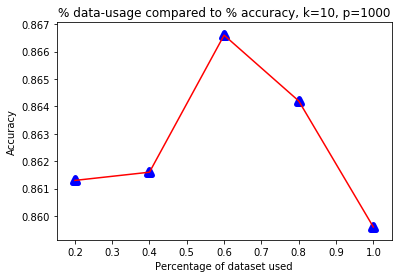

In [22]:
# Plot your graph exploring the relationship between the training set size and performance for k=10, p=1000.
# Remember that the following things are required for each graph: x/y axes labels, title, legend (if multiple data 
# series)

plt.plot(list(performance_dict.keys()), list(performance_dict.values()), color='r')
plt.scatter(list(performance_dict.keys()), list(performance_dict.values()), color='b', marker='^', linewidth=5)
plt.xlabel("Percentage of dataset used")
plt.ylabel("Accuracy")
plt.title("% data-usage compared to % accuracy, k=10, p=1000")

Write your analysis here (2-3 sentances). No more than a short paragraph.

With $k=10$ and $p=1000$ fixed, we varied the size of the subset of data that p was drawn from and repeatedly looked at the accuracy for each different percent of total data available, **(20%, 40%, 60%, 80%, 100%)**.

What we see is a reasonable consistent postive trend up; where the greater the percent of the original data is used to draw the prototypes from, the greater the accuracy of the model with fixed $k$ and $p$. 

Note that the relative increase is not particulary dramatic; because of the random nature of the prototypes and our **$I.I.D$** assumption  of our general distribution **$D$**, this makes sense. 

**Part B:** Now suppose we use the entire training set to fit the classifier, and still fix $p=1000$. Explore the relationship between the number of nearest neighbors ($k$) and accuracy on the test set.

The procedure is the same as part A: Fill in the code to build and test the models, fill in the code to plot the graph, then write your explanation/analysis.

In [23]:
k_vals = [1, 3, 7, 11, 21, 41, 81]
num_proto = 1000
performance_dict = {}


for k in k_vals:
    knn, _, __ = build_model(data.train_x, data.train_y, k, num_proto)
    y_pred = knn.predict(data.test_x)
    y_true = data.test_y
    
    confmat = get_confusion_matrix(y_true, y_pred,  np.array([_ for _ in range(10)]))
    acc = get_accuracy(confmat)
    
    performance_dict[k] = acc
    print ("k: {}, p: {}, Accuracy : {}".format(k, num_proto, 100 * performance_dict[k]))

k: 1, p: 1000, Accuracy : 88.18
k: 3, p: 1000, Accuracy : 88.25
k: 7, p: 1000, Accuracy : 86.56
k: 11, p: 1000, Accuracy : 86.25
k: 21, p: 1000, Accuracy : 82.92
k: 41, p: 1000, Accuracy : 79.44
k: 81, p: 1000, Accuracy : 73.25


Text(0.5, 1.0, 'K-neighbors compared to % accuracy on all data p=1000')

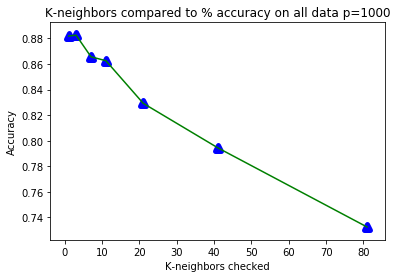

In [24]:
# Plot your graph exploring the relationship between the k-parameter on full data with p=1000.
# Remember that the following things are required for each graph: x/y axes labels, title, legend (if multiple data 
# series)
plt.plot(list(performance_dict.keys()), list(performance_dict.values()), color='g')
plt.scatter(list(performance_dict.keys()), list(performance_dict.values()), color='b', marker='^', linewidth=5)
plt.xlabel("K-neighbors checked")
plt.ylabel("Accuracy")
plt.title("K-neighbors compared to % accuracy on all data p=1000")

Write your analysis here (2-3 sentances). No more than a short paragraph. Include in your analysis some reasoning for $k$'s effect on the trend of the graph.

We used the entire training dataset each time and varied the parameter $k$ from many different values. Interestingly enough, we find that the best accuracies are actually on relatively low values of $k$, somewhere around **$1$, $3$, $5$** when we use the entire dataset. And we do see a decline in accuracy when we increase $k$ past these values that is consistent. Therefore when using the whole dataset using a small $k$ seems preferable for this particular classification task. 

This may be because we are fixed at $p=1000$, so when we increase $k$ arbitrarily with a fixed $p$ we see a decrease in test accuracy because of overfitting; we have induced more chance structure on the training data if we do this. 

**Part C**: Now we fix $k=10$ and explore the relationship between the values of $p$ and performance.

The procedure is the same as part A: Fill in the code to build and test the models, fill in the code to plot the graph, then write your explanation/analysis.

(Note that for your own testing, you can try arbitray list of `p_vals` below. But when you turn this notebook in, p_vals should be set to the original values:
```
p_vals = [10, 100, 500, 1000]
```

In [25]:
p_vals = [10, 100, 500, 1000]
k = 10
performance_dict = {}

for num_proto in p_vals:
    knn, _, __ = build_model(data.train_x, data.train_y, k, num_proto)
    y_pred = knn.predict(data.test_x)
    y_true = data.test_y
    
    cnf_matrix = get_confusion_matrix(y_true, y_pred, np.array([_ for _ in range(10)]))
    acc = get_accuracy(cnf_matrix)
    
    performance_dict[num_proto] = acc
    
    print ("k: {}, p: {}, Accuracy : {}".format(k, num_proto,
            100 * performance_dict[num_proto]))

k: 10, p: 10, Accuracy : 10.32
k: 10, p: 100, Accuracy : 57.84
k: 10, p: 500, Accuracy : 79.53
k: 10, p: 1000, Accuracy : 86.50999999999999


Text(0.5, 1.0, 'Numper of prototype data compared to % accuracy, k=10')

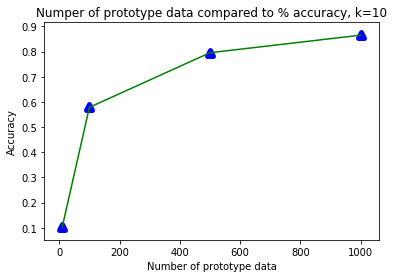

In [26]:
# Plot your graph exploring the relationship between the number of prototypes and test set performance for k=10
plt.plot(list(performance_dict.keys()), list(performance_dict.values()), color='g')
plt.scatter(list(performance_dict.keys()), list(performance_dict.values()), color='b', marker='^', linewidth=5)
plt.xlabel("Number of prototype data")
plt.ylabel("Accuracy")
plt.title("Numper of prototype data compared to % accuracy, k=10")

Write your analysis here (2-3 sentances). No more than a short paragraph.

Be sure to comment on any tradeoffs (between complexity, performance, etc.) if any.

Here there is a very clear and strong relationship between the **number of prototypes** and **accuracy** with a fixed value of $k$. If our number of prototypes is desparately small clearly we can't do a good job capturing the complexity of the task (underfitting), but quickly as $p$ approaches $1000$ the gain we get starts to level out at a high accuracy of around $0.9$.

This is a direct tradeoff between increased complexity for better performance or accuracy on the test set! 

### Perceptron - 10 points
***
Consider the IRIS dataset discussed in lecture. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length. This training data and the modified labels can be loaded using `IrisM` class. We are going to use this dataset for training a Perceptron classifier in subsequent problems. 

In [27]:
# We are setting the PRN seed for repeatability - do not change this cell.
np.random.seed(12345)

In [28]:
class IrisM:
    """
    Class to store modified iris data for Perceptron Training
    """
    
    def __init__(self):
        iris = load_iris()
        
        # only taking first two features
        X = iris.data[:, :2]
        y = iris.target[:]
        
        # only considering whether it is setosa or not
        y[iris.target != 0] = -1
        y[iris.target == 0] = 1
        mask = np.random.choice(a = [False, True], size = 150, p = (0.66, 1 - 0.66))
        
        self.train_x, self.train_y = X[mask], y[mask]
        self.test_x, self.test_y = X[~mask], y[~mask]

iris = IrisM()

The functions below implement te Perceptron classifier. Note that in our case the model is completely specified by the weight vector `theta`. We will build the model from scratch, so instead of passing around a Scikit-Learn object, we will instead return `theta` from the build_perceptron model and pass that to the prediction functions. The labels for the examples are -1 or 1. This is a simple preceptron classifier seen in class where the linear separator passes through the origin i.e has offset parameter = 0. Your tasks are as following:

### Implement build_perceptron_model

The first task is to implement the below method `build_perceptron_model`. It takes a matrix `train_X` of training examples (one per row) and a vector `train_y`. Note that `train_X` could have an arbitrary number of columns (you cannot assume it is the same as the number of features in `iris`. 

This function should perform the `perceptron` iterative training process described in class and return `theta`, the weight vector, as well as `epoch`, the total number of cycles through the data required during the training process. Break from the training loop when either:
1. You reach 200 epochs or 
2. You cycled through the data without any misclassifications

Follow the function spec. Note again, we give you some example sanity tests, but your code will be tested against other tests and looked at overall for correctness.

In [29]:
def build_perceptron_model(train_X, train_y):
    '''
    Returns 'theta', the weights of the Perceptron
    classifier.
    
    Args:
        train_X: (numpy array) the training features,
        train_y: (numpy array) the training labels
        
    Returns:
        theta : (numpy array) the weight vector of the trained perceptron model
        epochs: (int) the number of cycles through the dataset required to converge.
    '''
    theta = np.zeros_like(train_X[0])
    iter_count = 0
    epochs = 0
    # YOUR CODE HERE
    upd_count = 0
    perfect_run = False
    while epochs < 200 and perfect_run == False:
        p = True
        for i, (xi, yi) in enumerate(zip(train_X, train_y)):
            y_p = np.sign(np.dot(theta, xi))
            if y_p != yi:
                theta = theta + (yi * xi)
                p = False
                upd_count += 1
        perfect_run = p
        epochs += 1
    return theta, epochs

In [30]:
# Sanity tests for build_perceptron_model
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_t, test_epochs = build_perceptron_model(test_x, test_y)
assert(test_epochs == 2)

### Implement the prediction/inference function

Below, implement `predict_perceptron` according to the specification. Note that like the Scikit-Learn classes, your class should accept a `np.ndarray` with each row corresponding to an example. It should output a vector of predicted labels. 

In [31]:
def predict_perceptron(theta: np.ndarray, data_X : np.ndarray):
    '''
    Predicts the labels on the data 'data_x' 
    using a perceptron with weights defined by 'theta'
    '''
    predicted_y = np.zeros((data_X.shape[0]))
    result_matrix = np.dot(theta, data_X)
    return predicted_y

In [32]:
# Sanity tests for predict_perceptron
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_t, test_epochs = build_perceptron_model(test_x, test_y)
test_pred_y = predict_perceptron(test_t, test_valid_x)
assert(test_epochs == 2)

### Implement the get_margin function

Below, implement a function which acccepts a `theta` weight vector for the perceptron model and a set of training examples `train_X`. It should return the "margin" of the classifier as we defined in class. 

In [33]:
def get_margin(theta: np.ndarray, train_X, train_y):
    '''
    Returns the geometric margin of the classifier on the given 
    training set. 'train_X' is assumed to be the same 'train_X'
    used in the 'build_perceptron_model' function.
    
    args:
        theta: np.ndarray: weight vector for perceptron
        train_X: the np.ndarray representing the feature vectors. 
    '''
    # YOUR CODE HERE
    theta_1 = theta[0]
    theta_2 = theta[1]
    
    x = np.array([-1*theta_1, theta_2])
    r = np.linspace(-1, 1, num=100)
    line = [x*ri for ri in r]

    min_dist = 1000
    for i, xi in enumerate(train_X):
        for p in line:
            dist_p = np.linalg.norm(np.array(xi) - np.array(p))
            if dist_p < min_dist:
                min_dist = dist_p
    return min_dist

In [34]:
# Sanity checks for perceptron.
# Sanity tests for predict_perceptron
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_t, test_epochs = build_perceptron_model(test_x, test_y)
margin = get_margin(test_t, test_x, test_y)
print(margin)
assert(margin < 1)

0.7071428534621066


In [35]:
# Do not remove this cell.


### Evaluating Perceptron

Now, we are going to using `IrisM` dataset to train a perceptron using `Perceptron` class.

**Part A:** From class we know that this data is linearly separable but the separator does not pass through the origin. Therefore you will need to follow the technique used in lecture to further pre-process the data to be linearly separable through the origin: for each data point, add an additional feature, set to a constant value (please use the value 1 for consistency).

In [36]:
def append_constant_feature(train_X):
    '''
    Takes a dataset (less labels) 'train_X' and returns a 
    modified version of the dataset with another feature set to a constant '1'
    '''
    modified_dataset = train_X
    
    # YOUR CODE HERE
    modified_dataset = np.zeros((train_X.shape[0], train_X.shape[1] + 1))
    for i, train_xi in enumerate(train_X):
        new_data = [x for x in train_xi]
        new_data.append(1)
        modified_dataset[i][:] = np.array(new_data)
    
    return modified_dataset

In [37]:
### Sanity check (note that this will expose problems in your 
# previous functions if they can't except arbitrary number of features)
# You should converge in less than 100 epochs.
test_x = np.array([[0, 10], [0, 5]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_x = append_constant_feature(test_x)
assert(test_x.shape[1] == 3)
test_t, test_epochs = build_perceptron_model(test_x, test_y)
assert(test_epochs < 100)

### Train Perceptron on the Iris Dataset

Now that we have the ability to produce a modified dataset, train the Perceptron classifier on the iris dataset loaded in the class above. 

Have your code print out the number of epochs (number of times it cycled through the entire dataset) until convergence. 

In [38]:
# YOUR CODE HERE
data_xr1 = append_constant_feature(iris.train_x)
theta, epochs = build_perceptron_model(data_xr1, iris.train_y)
print("epochs until convergence: %d!" % epochs)

epochs until convergence: 13!


What is the angle between Perceptron's classification vector `theta` found above and vector $(1, 0, 1)^T$? Report your answer in radians.

In [39]:
print("theta is: ", theta)
v = np.array([1, 0, 1])
v = v.T
cosTheta = np.dot(theta, v) / (np.linalg.norm(theta) * np.linalg.norm(v)) 
print("angle between Theta and [1, 0, 1].T == %f radians" % np.arccos(cosTheta))

theta is:  [-6.9 11.6  2. ]
angle between Theta and [1, 0, 1].T == 1.827545 radians


Report the accuracy on the test set. Be sure to do the same feature modifications to the test set as the training set. (Reuse the theta vector from above, don't re-fit the model in this cell.)

In [40]:
mistakes = 0
iters_ = 0
for i, (xi, yi) in enumerate(zip(append_constant_feature(iris.test_x), iris.test_y)):
    x = np.array(xi)
    y_pred = np.sign(np.dot(theta, x))
    if y_pred != yi:
        mistakes += 1
    iters_ += 1

print('The accuracy of Theta on the test data is:', (iters_ - mistakes) / iters_)

The accuracy of Theta on the test data is: 0.9789473684210527


Report the geometric margins of your classifier with respect to the `IrisM` dataset used. Recall that the distance of a point $x_t$ from the line/surface $\theta^T x = 0$ is $|\frac{\theta^Tx_t}{||x||}|$

In [41]:
m = get_margin(theta, iris.test_x, iris.test_y)
print("margin is: ", m)

margin is:  2.11696761488242
